# Data Preprocessing

## importing necessary libraries

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

## Load Dataset

In [221]:
data=pd.read_csv('Employee.csv')

In [222]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## 1. Data Exploration

In [223]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [225]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [226]:
data.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [227]:
data.nunique() # to find out unique values count

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

## 2. Data Cleaning

### Find out Duplicates rows

In [228]:
# To find out duplicate is there or not
dup=data.duplicated().sum()
print('No. of duplicates rows: ',dup)

No. of duplicates rows:  4


In [229]:
# Display Duplicated 4 rows
dup_rows=data.duplicated()
data[dup_rows]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [231]:
# Removing duplicated 4 rows
data.drop_duplicates(inplace=True)  # Removed duplicate rows

In [232]:
# After duplicates removed
data.info()
print("\n Dataset have only 144 rows after 4 duplicates removed")

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      127 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB

 Dataset have only 144 rows after 4 duplicates removed


In [233]:
# To confirm there are no duplicates rows
dup=data.duplicated().sum()
dup

0

### Replace the value 0 in age as NaN

In [234]:
# To check whether there are any Zero values in Age column
data[data['Age']==0]

,Company,Age,Salary,Place,Country,Gender
88,Infosys,0.0,3030.0,Calcutta,India,0
92,TCS,0.0,3045.0,Delhi,India,0
101,CTS,0.0,2034.0,Podicherry,India,0
107,TCS,0.0,9024.0,Chennai,India,1
111,Infosys,0.0,3234.0,Mumbai,India,0
121,CTS,0.0,1234.0,Calcutta,India,0


In [235]:
# To Replace 0.0 with NaN 
data['Age'].replace(0,np.nan, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_7784\3996155567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].replace(0,np.nan, inplace=True)


In [236]:
data[data['Age']==0]

,Company,Age,Salary,Place,Country,Gender


### To Check Null/NaN Values

In [237]:
# To check Null values
nul=data.isnull().any()
print(nul)
print("\nNumber of columns having Null values are: ",nul.sum())

Company     True
Age         True
Salary      True
Place       True
Country    False
Gender     False
dtype: bool

Number of columns having Null values are:  4


## To Replace Null/NaN  with values (Mean, Meadian, Mode)

In [238]:
# Company column fill with 'ABCD Company' by using fillna()
data['Company'].fillna('ABCD Company', inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_7784\2000250570.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Company'].fillna('ABCD Company', inplace=True)


In [239]:
# To check Null values after fillna() applied on Company column
nul=data.isnull().any()
print(nul)
print("\nNumber of columns having Null values are: ",nul.sum())

Company    False
Age         True
Salary      True
Place       True
Country    False
Gender     False
dtype: bool

Number of columns having Null values are:  3


In [240]:
# Age is filled with mode()
data['Age'].fillna(data['Age'].mode()[0], inplace=True)

nul=data.isnull().any()
print(nul)
print("\nNumber of columns having Null values are: ",nul.sum())

Company    False
Age        False
Salary      True
Place       True
Country    False
Gender     False
dtype: bool

Number of columns having Null values are:  2


C:\Users\user\AppData\Local\Temp\ipykernel_7784\3302972372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mode()[0], inplace=True)


In [241]:
data['Salary'].fillna(data['Salary'].mean(),inplace=True)

nul=data.isna().any()
print(nul)
print("\nNumber of columns having Null values are: ",nul.sum())

Company    False
Age        False
Salary     False
Place       True
Country    False
Gender     False
dtype: bool

Number of columns having Null values are:  1


C:\Users\user\AppData\Local\Temp\ipykernel_7784\2643392500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Salary'].fillna(data['Salary'].mean(),inplace=True)


In [242]:
data['Place'].fillna('No Place',inplace=True)
nul=data.isna().any()
print(nul)
print("\nNumber of columns having Null values are: ",nul.sum())

Company    False
Age        False
Salary     False
Place      False
Country    False
Gender     False
dtype: bool

Number of columns having Null values are:  0


C:\Users\user\AppData\Local\Temp\ipykernel_7784\2914930924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Place'].fillna('No Place',inplace=True)


### Outlier Detection by using IQR

In [243]:
Q1=data['Salary'].quantile(0.25)
Q1

3045.0

In [244]:
Q3=data['Salary'].quantile(0.75)
Q3

7084.0

In [245]:
Q4=data['Salary'].quantile(0.99)
Q4

9621.439999999995

In [246]:
IQR=Q3-Q1
IQR

4039.0

In [247]:
outlier=data[(data['Salary']<Q1) & (data['Salary']>Q3)].count()
outlier

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

## 3. Data Analysis

### Questions
    1. Filter the data with age >40 and salary<5000, Plot the chart with age and salary:
    2. Count the number of people from each place and represent it visually

In [248]:
filt_data=data[(data['Age']>40) & (data['Salary']<5000)]
filt_data


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [249]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


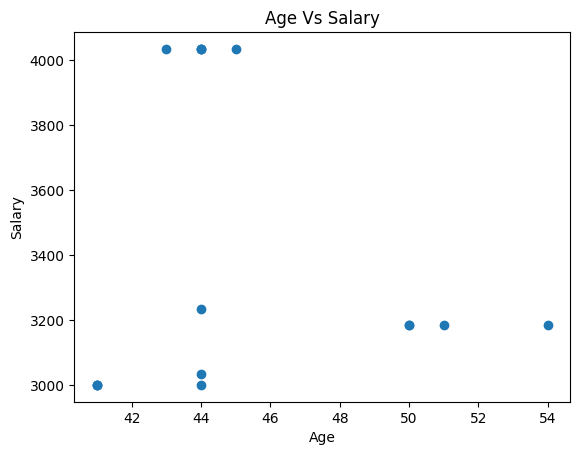

In [250]:
plt.scatter(filt_data['Age'], filt_data['Salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age Vs Salary")
plt.show()

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
No Place      14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64
Index(['Mumbai', 'Calcutta', 'Chennai', 'Delhi', 'No Place', 'Cochin', 'Noida',
       'Hyderabad', 'Podicherry', 'Pune', 'Bhopal', 'Nagpur'],
      dtype='object', name='Place')
[34 32 14 14 14 13  8  8  3  2  1  1]


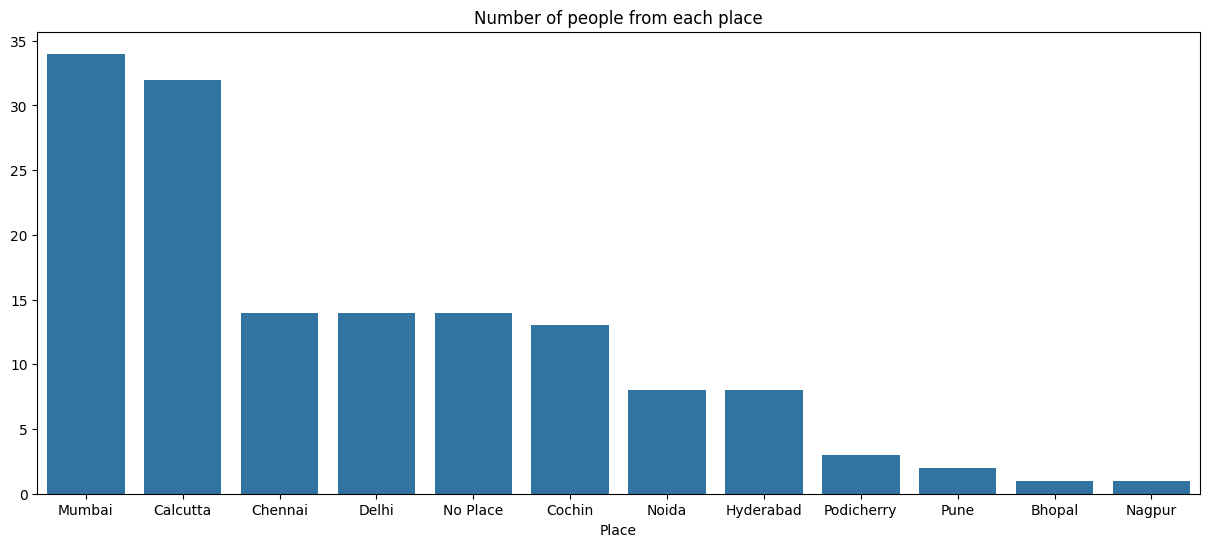

In [251]:
# 2. Count the number of people from each place and represent it visually
count=data['Place'].value_counts()
print(count)
print(count.index)
print(count.values)
plt.figure(figsize=(15,6))
sns.barplot(x=count.index, y=count.values)
plt.title("Number of people from each place")
plt.show()

## 4. Data Encoding:
    Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, 
    making them suitable for analysis by machine learning algorithms.

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [253]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


## Using Label Encoder()

In [254]:
label_encoder = LabelEncoder()
data['Company'] = label_encoder.fit_transform(data['Company'])
data['Place']=label_encoder.fit_transform(data['Place'])
data['Country']=label_encoder.fit_transform(data['Country'])
data.head(10)


,Company,Age,Salary,Place,Country,Gender
0,5,20.0,5283.471074,2,0,0
1,3,30.0,5283.471074,6,0,0
2,5,35.0,2300.000000,1,0,0
3,3,40.0,3000.000000,4,0,0
4,5,23.0,4000.000000,6,0,0
5,3,22.0,5000.000000,1,0,0
6,5,22.0,6000.000000,2,0,1
7,3,23.0,7000.000000,6,0,1
8,5,34.0,8000.000000,1,0,1
9,1,45.0,9000.000000,4,0,0


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    int32  
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    int32  
 4   Country  144 non-null    int32  
 5   Gender   144 non-null    int64  
dtypes: float64(2), int32(3), int64(1)
memory usage: 6.2 KB


In [256]:
# Data loaded again to check the OneHotEncoder
#data=pd.read_csv('Employee.csv')

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    int32  
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    int32  
 4   Country  144 non-null    int32  
 5   Gender   144 non-null    int64  
dtypes: float64(2), int32(3), int64(1)
memory usage: 6.2 KB


In [258]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,5,20.0,5283.471074,2,0,0
1,3,30.0,5283.471074,6,0,0
2,5,35.0,2300.000000,1,0,0
3,3,40.0,3000.000000,4,0,0
4,5,23.0,4000.000000,6,0,0


## Using OneHotEncoder

In [259]:
# Example using OneHotEncoder
data = pd.get_dummies(data, columns=['Country'])


In [260]:
data

,Company,Age,Salary,Place,Gender,Country_0
0,5,20.0,5283.471074,2,0,True
1,3,30.0,5283.471074,6,0,True
2,5,35.0,2300.000000,1,0,True
3,3,40.0,3000.000000,4,0,True
4,5,23.0,4000.000000,6,0,True
...,...,...,...,...,...,...
142,4,22.0,8202.000000,6,0,True
143,5,33.0,9024.000000,1,1,True
145,3,44.0,4034.000000,4,1,True
146,5,33.0,5034.000000,6,1,True


## 5. Feature Scaling:
    After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

## Using StandardScaler()

In [266]:
scaler=StandardScaler()
data_scaled = scaler.fit_transform(data)
data

,Company,Age,Salary,Place,Gender,Country_0
0,5,20.0,5283.471074,2,0,True
1,3,30.0,5283.471074,6,0,True
2,5,35.0,2300.000000,1,0,True
3,3,40.0,3000.000000,4,0,True
4,5,23.0,4000.000000,6,0,True
...,...,...,...,...,...,...
142,4,22.0,8202.000000,6,0,True
143,5,33.0,9024.000000,1,1,True
145,3,44.0,4034.000000,4,1,True
146,5,33.0,5034.000000,6,1,True


In [268]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#data_scaled

## Using MinMaxScaler()

In [269]:
minmax_scaler = MinMaxScaler()
data_minmax_scaled = minmax_scaler.fit_transform(data)
#data_minmax_scaled

In [178]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=data.columns)

In [161]:
data

,Company,Age,Salary,Place,Country,Gender
0,5,20.0,5283.471074,2,0,0
1,3,30.0,5283.471074,6,0,0
2,5,35.0,2300.000000,1,0,0
3,3,40.0,3000.000000,4,0,0
4,5,23.0,4000.000000,6,0,0
...,...,...,...,...,...,...
142,4,22.0,8202.000000,6,0,0
143,5,33.0,9024.000000,1,0,1
145,3,44.0,4034.000000,4,0,1
146,5,33.0,5034.000000,6,0,1


In [271]:
data_minmax_scaled

array([[0.83333333, 0.08108108, 0.47734962, 0.18181818, 0.        ,
        0.        ],
       [0.5       , 0.35135135, 0.47734962, 0.54545455, 0.        ,
        0.        ],
       [0.83333333, 0.48648649, 0.13781723, 0.09090909, 0.        ,
        0.        ],
       [0.5       , 0.62162162, 0.21748037, 0.36363636, 0.        ,
        0.        ],
       [0.83333333, 0.16216216, 0.33128485, 0.54545455, 0.        ,
        0.        ],
       [0.5       , 0.13513514, 0.44508934, 0.09090909, 0.        ,
        0.        ],
       [0.83333333, 0.13513514, 0.55889382, 0.18181818, 1.        ,
        0.        ],
       [0.5       , 0.16216216, 0.6726983 , 0.54545455, 1.        ,
        0.        ],
       [0.83333333, 0.45945946, 0.78650279, 0.09090909, 1.        ,
        0.        ],
       [0.16666667, 0.75675676, 0.90030727, 0.36363636, 0.        ,
        0.        ],
       [0.16666667, 0.16216216, 0.47734962, 0.54545455, 0.        ,
        0.        ],
       [0.16666667, 0